# Bussines question:


RESEARCH OBJECTIVES: Real Estate Market Optimization using Machine Learning

<b>business question:<b/> How can housing attributes help predict and improve property pricing?

Which factors influence property pricing and how can machine learning models identify these factors and predict the house pricing?


🔘 1. How can machine learning models be utilized to analyze, predict, and explain factors affecting property valuation and demand?
Application of regression models (Linear Regression, Random Forest, Neural Networks) for property price prediction.
Identification of the most influential factors (e.g., location, size, energy efficiency, market trends).
🔘 2. Can classification models predict the likelihood of a property selling within a specific time frame?
Binary classification (sold fast vs. slow) using Logistic Regression, Decision Trees, and XGBoost.
Impact of property features, pricing, and marketing on sales speed.
🔘 3. How can clustering techniques segment the real estate market into meaningful groups for targeted investment and pricing strategies?
Unsupervised learning (K-Means, DBSCAN) to group properties based on price, location, and features.
Identifying high-value investment clusters vs. slow-selling regions.
🔵 Bonus:
Can natural language processing (NLP) extract insights from property descriptions to enhance price and sales predictions?

BERT embeddings & Topic Modeling (BERTopic) for analyzing property descriptions.
Identifying descriptive keywords that correlate with high sales and price appreciation.

### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">1. Importing Libraries</span>




In [35]:
# Importing basic Librarie

# ==============================
# Data Manipulation & Analysis
# ==============================
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis
import polars as pl  # Alternative high-performance dataframe library

# ==============================
# Statistical Analysis
# ==============================
import scipy.stats as stats  # Statistical functions and hypothesis testing
from scipy.stats import (
    f_oneway,  # ANOVA test
    kruskal,  # Kruskal-Wallis H-test
    levene,  # Levene test for equal variances
    shapiro,  # Shapiro-Wilk test for normality
    randint  # Random integers for distributions
)
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Post-hoc Tukey's test

# ==============================
# Data Visualization
# ==============================
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns  # Statistical data visualization
import graphviz  # Visualizing decision trees
from wordcloud import WordCloud  # Generate word clouds

# Matplotlib specific imports
import matplotlib.colors as mcolors  # Color manipulation for plots
from matplotlib.colors import ListedColormap  # Custom colormaps
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# Advanced visualization tools
from plotnine import *  # Grammar of graphics for Python (ggplot-like)

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import skew



In [3]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">2. Reading Files</span>


In [4]:
# Defining file paths
funda_housing_dataset_path = r"C:\Users\josel\OneDrive\Documents\block 3\Resit AI\housing_data.csv"

#read csv file
funda_housing_df = pd.read_csv(funda_housing_dataset_path)

### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Exploratory Data Analysis </span>

## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.1 Overview of the Funda dataset and its attributes</span>


In [26]:
# View the first 20 row of the funda housing data set
funda_housing_df

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1974,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613507,116,2019-03-07
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1995,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,1.0,NaN,4613532,84,2019-01-17
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,<{bungalow}> <{vrijstaande woning}> (<{semi-bu...,<{Woonhuis}>,1948,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613537,99,2019-08-03
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",<{eengezinswoning}> <{2-onder-1-kapwoning}>,<{Woonhuis}>,2006,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,1.0,A,4613566,172,2019-04-08


### <span style="color: #7AD6C7; font-size: 36px; font-weight: bold;">Explanation of the Funda Housing Dataset</span>

The **Funda Housing Dataset** provides a detailed information about real estate listings in the Netherlands. 
Each row represents a property listed with attributes such as location, pricing, features, and energy efficiency.

➤ <span style='color: #7AD6C7;'>globalId:</span>  Unique identifier for the property listing  <br>  
➤ <span style='color: #7AD6C7;'>publicatieDatum:</span>  The date when the house or property was published  <br>  
➤ <span style='color: #7AD6C7;'>postcode:</span>  Postal code of the property’s location  <br>  
➤ <span style='color: #7AD6C7;'>koopPrijs:</span>  Purchase price of the property in euros  <br>  
➤ <span style='color: #7AD6C7;'>volledigeOmschrijving:</span>  Full description of the property  <br>  
➤ <span style='color: #7AD6C7;'>soortWoning:</span>  Type of house (e.g., boat house, apartment, detached)  <br>  
➤ <span style='color: #7AD6C7;'>categorieObject:</span>  Category of the object (e.g., residential)  <br>  
➤ <span style='color: #7AD6C7;'>bouwjaar:</span>  Year the property was built  <br>  
➤ <span style='color: #7AD6C7;'>indTuin:</span>  Indicates if the property has a garden  <br>  
➤ <span style='color: #7AD6C7;'>perceelOppervlakte:</span>  Total land area of the property (m²)  <br>  
➤ <span style='color: #7AD6C7;'>kantoor_naam_MD5hash:</span>  Hashed identifier of the real estate agency  <br>  
➤ <span style='color: #7AD6C7;'>aantalKamers:</span>  Number of rooms in the property  <br>  
➤ <span style='color: #7AD6C7;'>aantalBadkamers:</span>  Number of bathrooms in the property  <br>  
➤ <span style='color: #7AD6C7;'>energielabelKlasse:</span>  Energy efficiency rating (A, B, C, etc.)  <br>  
➤ <span style='color: #7AD6C7;'>globalId.1:</span>  Another unique identifier   <br>  
➤ <span style='color: #7AD6C7;'>oppervlakte:</span>  Total living area of the property (m²)  <br>  
➤ <span style='color: #7AD6C7;'>datum_ondertekening:</span>  Date of contract signing  <br>  










In [24]:
#source chatgpt

# Generate a summary table with column info
df_summary = pd.DataFrame({
    "Column": funda_housing_df.columns,
    "Data Type": funda_housing_df.dtypes.values,
    "Non-Null Count": funda_housing_df.notna().sum().values,
    "Unique Values": funda_housing_df.nunique().values
})

# Find columns with unique values less than 13
low_unique_columns = df_summary[df_summary["Unique Values"] < 13]["Column"].tolist()

# Create a DataFrame to store unique values of these columns
unique_values_data = {
    "Column": [],
    "Unique Values": []
}

for col in low_unique_columns:
    unique_values_data["Column"].append(col)
    unique_values_data["Unique Values"].append(", ".join(map(str, funda_housing_df[col].unique())))

df_unique_values = pd.DataFrame(unique_values_data)

# Display the tables
import pandas as pd
from IPython.display import display

print("📌 **Dataset Summary**")
display(df_summary.style.set_properties(**{'border': '1px solid lightblue', 'font-weight': 'bold'}, subset=['Column']))

print("\n📌 **Columns with Unique Values Below 13**")
display(df_unique_values.style.set_properties(**{'border': '1px solid lightblue', 'font-weight': 'bold'}, subset=['Column']))





📌 **Dataset Summary**


,Column,Data Type,Non-Null Count,Unique Values
0,globalId,int64,211617,211617
1,publicatieDatum,object,211617,365
2,postcode,object,211617,127150
3,koopPrijs,float64,210876,4439
4,volledigeOmschrijving,object,211617,194392
5,soortWoning,object,211617,359
6,categorieObject,object,211617,2
7,bouwjaar,object,211617,413
8,indTuin,int64,211617,2
9,perceelOppervlakte,float64,144376,4726



📌 **Columns with Unique Values Below 13**


,Column,Unique Values
0,categorieObject,"<{Woonhuis}>, <{Appartement}>"
1,indTuin,"1, 0"
2,aantalBadkamers,"nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0"
3,energielabelKlasse,"nan, B, C, E, G, A, D, F, A+++, A++, A+, A++++, A+++++"


### <span style="color: #7AD6C7; font-size: 36px; font-weight: bold;">**Analysis of Unique Categorical Values from the Funda Dataset**</span>



**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Understanding the Dataset Structure</span>**  

The table above provides a detailed **summary of the dataset**, which shows the **data types, non-null counts, and the number of unique values per column**.  

This gives a better overview of the **distribution of the data, potential missing values, and categorical distinctions**, the NaN values are further analyzed in **Chapter 3.2**.  

---

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Key Observations</span>**  

- **Columns with the highest unique values**:  

  - **<span style="color:#7AD6C7;">globalId</span>** → 211,617 unique values, meaning each row has a unique identifier, as the total number of rows is also 211,617.  
  - **<span style="color:#7AD6C7;">postcode</span>** → 127,150 unique values, which indicates a wide range of property locations.  
  - **<span style="color:#7AD6C7;">koopPrijs</span>** → 4,439 unique values, showing significant variation in house prices.  
  - **<span style="color:#7AD6C7;">volledigeOmschrijving</span>** → 194,392 unique descriptions, suggesting this column contains **rich textual data**.  

<br>  

- **Columns with the lowest unique values** (displayed in the second table):  

  - **<span style="color:#7AD6C7;">categorieObject</span>** → Only **2 unique values** (`Woonhuis`, `Appartement`), which shows that the properties sold in this dataset are either houses or apartments.  
  - **<span style="color:#7AD6C7;">indTuin</span>** → **2 unique values** (`0, 1`), indicating whether there is a garden (`1`) or no garden (`0`).  
  - **<span style="color:#7AD6C7;">aantalBadkamers</span>** → **8 unique values**, showing variation in the number of bathrooms from **1 to 8**.  
  - **<span style="color:#7AD6C7;">energielabelKlasse</span>** → **12 unique values**, this column includes energy ratings from **B to G** and highly efficient labels like **A+, A++, A+++**.  

---

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Next Steps</span>**  

- **Investigate Missing Values** → Some columns, like **<span style="color:#7AD6C7;">koopPrijs</span>** and **<span style="color:#7AD6C7;">energielabelKlasse</span>**, among others, have missing values that may need imputation.  

In [6]:
# sales speed
# omschrijving → vector embeddings 

## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.2 Cleaning the Funda housing dataset
</span>




In chapter 3.2, duplicates will be removed and teh dataset will be analysed or checked wether it contains nan values.

### 3.2.1 Checking for duplicated rows 

In [7]:
# show amount of duplicated rows if applicable 
row_duplicates= funda_housing_df.duplicated().sum()
print('The total amount of duplicated rows in the funda housing dataset is: ' ,row_duplicates )

The total amount of duplicated rows in the funda housing dataset is:  0


### 3.2.2 Checking for nan values

In [8]:
# Show the number of rows and columns
print("Total rows and columns in funda_housing_df:", funda_housing_df.shape)

# Checking null values, data types, and NaN percentages for funda_housing_df
summary_funda_df = pd.DataFrame({
    "Column Name": funda_housing_df.columns,
    "Null Count": funda_housing_df.isnull().sum().values,
    "Data Type": funda_housing_df.dtypes.values,
    "NaN Percentage": (funda_housing_df.isnull().sum().values / len(funda_housing_df)) * 100
})

# Display the summary DataFrame
summary_funda_df

Total rows and columns in funda_housing_df: (211617, 17)


,Column Name,Null Count,Data Type,NaN Percentage
0,globalId,0,int64,0.000000
1,publicatieDatum,0,object,0.000000
2,postcode,0,object,0.000000
3,koopPrijs,741,float64,0.350161
4,volledigeOmschrijving,0,object,0.000000
5,soortWoning,0,object,0.000000
6,categorieObject,0,object,0.000000
7,bouwjaar,0,object,0.000000
8,indTuin,0,int64,0.000000
9,perceelOppervlakte,67241,float64,31.774857


### <span style="color: #7AD6C7; font-size: 32px; font-family: 'Times New Roman'; font-weight: bold;">Columns with NaN Values and analysis</span>



#### <span style="color:#7AD6C7; font-size: 28px; font-family: 'Times New Roman'; font-weight: bold;"> A) Columns with few or low percentage of missing values:</span>

➤ **<span style="color: #7AD6C7;">koopPrijs</span>** → **0.35% missing**  
   🔹 **Action:** **Impute using median**  

**<span style="color: #7AD6C7;font-size: 26px; font-family: 'Times New Roman'; font-weight: bold;">Reason for imputing these values</span>**

The missing values percentage for the house price column is **very low (0.35%)**, so the misisng values will be **imputed using the median** in order to prevent skewness in the distribution. By imputing the misisng values it prevents unnecessary data loss and keeps the dataset complete. By using methods like the median (for numbers) or mode (for categories) it helps maintain data consistency without changing its overall pattern

#### <span style="color:#7AD6C7; font-size: 28px; font-family: 'Times New Roman'; font-weight: bold;"> B) Columns with many or high percentage of missing values:</span>

➤ **<span style="color: #7AD6C7;">aantalBadkamers</span>** → **28.90% missing**  
   🔹 **Action:** **Impute based on KNN imputation method**  

➤ **<span style="color: #7AD6C7;">perceelOppervlakte</span>** → **31.77% missing**  
   🔹 **Action:** **Impute based on KNN imputation method** 

➤ **<span style="color: #7AD6C7;">energielabelKlasse</span>** → **58.00% missing**  
   🔹 **Action:** **Impute based on KNN imputation method** 

**<span style="color: #7AD6C7;font-size: 26px; font-family: 'Times New Roman'; font-weight: bold;">Reason for using KNN imputation on misisng values</span>**

The missing values for the amount of bathrooms should be filled with the KNN imputation as it is a better choice for aantalBadkamers because it assigns values based on similar properties (considering factors like oppervlakte, koopPrijs, and soortWoning). There is a total of **31.77%** of missing values which is why dropping the column may **remove too much data**, same for energielabelKlasse as it has 58% missing values. Since these feature are important for property pricing, large amount of missing values should be imputed using KNN instead of simple methods like median imputation. KNN will estimate missing values based on similar properties like property type, region, and bouwjaar to ensure accuracy.

---

### <span style="color: #7AD6C7; font-size: 30px; font-family: 'Times New Roman'; font-weight: bold;">Final Actions:</span>

| **Column** | **NaN Percentage** | **Description of how Nan values will be handled** |
|-----------|-----------------|----------------|
| **koopPrijs** | **0.35%** | **Impute (median)** |
| **perceelOppervlakte** | **31.77%** | **KNN imputation method** |
| **aantalBadkamers** | **28.90%** | **KNN imputation method** |
| **energielabelKlasse** | **58.00%** | **KNN imputation method** |





### 3.2.2 Handling missing values



In [ ]:
# source chatgpt 

# Create a copy of the dataset
df_funda_imputed = funda_housing_df.copy()

# Define columns for different imputation methods
median_columns = ['koopPrijs']
knn_columns = ['perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse']

# Apply Median Imputation for koopPrijs
df_funda_imputed[median_columns] = df_funda_imputed[median_columns].fillna(df_funda_imputed[median_columns].median())

# Convert categorical column 'energielabelKlasse' to numerical (excluding NaNs)
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].astype('category')

# Map categories to numbers starting from 1 (avoid NaN being mapped as 0)
energy_label_mapping = {label: idx + 1 for idx, label in enumerate(df_funda_imputed['energielabelKlasse'].cat.categories)}

# Convert categorical labels to numbers (NaN stays NaN)
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].map(energy_label_mapping)

# Initialize KNN Imputer (using 5 nearest neighbors)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation only to selected columns (energielabelKlasse now starts from 1)
df_funda_imputed[knn_columns] = knn_imputer.fit_transform(df_funda_imputed[knn_columns])

# Round and convert 'energielabelKlasse' back to integer values
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].round().astype(int)

# Reverse the mapping: Assign back the original category labels
reverse_energy_label_mapping = {v: k for k, v in energy_label_mapping.items()}
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].map(reverse_energy_label_mapping)

# Display the mapping between numerical codes and energy labels
print("\nEnergy Label Mapping (Before Imputation):")
for label, num in energy_label_mapping.items():
    print(f"{num} → {label}")

print("\nEnergy Label Mapping (After Imputation):")
print(df_funda_imputed['energielabelKlasse'].value_counts())

# Display the first few rows of the modified DataFrame
df_funda_imputed.head(3)




Energy Label Mapping (Before Imputation):
1 → A
2 → A+
3 → A++
4 → A+++
5 → A++++
6 → A+++++
7 → B
8 → C
9 → D
10 → E
11 → F
12 → G

Energy Label Mapping (After Imputation):
energielabelKlasse
B         49767
C         40333
A++++     35068
D         23731
A         20584
A+++++    14607
E          9959
A+++       6629
F          5238
G          3692
A++        1597
A+          412
Name: count, dtype: int64


,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,552.150482,09F114F5C5EC061F6230349892132149,3,1.110927,B,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.000000,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.000000,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,552.150482,E983FEDC63D87BF61AE952D181C8FD17,3,1.110927,B,4399344,70,2018-11-23


In [13]:
# Check if there are any NaN values left after imputation
nan_summary = df_funda_imputed.isnull().sum()

# Filter only columns that still have missing values (if any)
nan_summary = nan_summary[nan_summary > 0]

# Display results
if nan_summary.empty:
    print("✅ No missing values found in df_funda_imputed! Imputation was successful.")
else:
    print("⚠️ Some columns still have missing values:")
    print(nan_summary)


✅ No missing values found in df_funda_imputed! Imputation was successful.


## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.3 Univariate Analysis part 1: Descriptive analysis
</span>

The descriptive statistics summary proides an overview of the numerical features in the dataset, which includes key statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum. The statistical measures gives an overview of the central tendency and spread of the data, nan values or inconsistent values, detect outliers that might affect predictive models



In [27]:
# Generate descriptive statistics summary for numerical columns
df_funda_imputed.describe()

,globalId,koopPrijs,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,globalId.1,oppervlakte
count,2.116170e+05,2.116170e+05,211617.000000,211617.000000,211617.000000,211617.000000,2.116170e+05,211617.000000
mean,4.313045e+06,3.212225e+05,0.707916,562.868671,4.656067,1.113318,4.313045e+06,120.083216
std,1.658150e+05,2.025170e+05,0.454722,2215.341621,1.582507,0.305145,1.658150e+05,49.580312
min,2.567727e+06,2.150000e+02,0.000000,10.000000,1.000000,1.000000,2.567727e+06,1.000000
25%,4.173352e+06,2.000000e+05,0.000000,159.000000,4.000000,1.000000,4.173352e+06,90.000000
50%,4.269237e+06,2.750000e+05,1.000000,276.000000,5.000000,1.000000,4.269237e+06,115.000000
75%,4.458446e+06,3.750000e+05,1.000000,478.200000,5.000000,1.000000,4.458446e+06,140.000000
max,4.613566e+06,9.950000e+06,1.000000,312195.000000,41.000000,8.000000,4.613566e+06,3210.000000


### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis** </span>

### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">House Prices (KoopPrijs)</span>

- The average cost of houses is **€321,225**, but prices range from as low as **€215** to a maximum of **€9.95 million**!  
- There is **a high variation** in prices, as shown by the **standard deviation (€202,517)**. 
- In short, this dataset contains a wide range of different house types, the data shows houses that were sold very affordable price to ultra-luxurious houses or properties.

---
 ### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Land Size (PerceelOppervlakte)</span>

- As it can be seen from teh table above the **average property size** is **458 m²**, but the largest property has a total of **312,195 m²**, which is a massive differnce in square meters.  
- However most houses or property sold have **land sizes between 162 m² and 286 m²**, so the massive properties are few or not **frequently sold**.

---

### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Number of Rooms (AantalKamers)</span>

- Most of the houses sold had an avergae of **4 to 5 rooms**, which could indicate these were houses for families and not single people.  
- However, some houses have up to **41 rooms**, these are **mansions or commercial properties** sold for high prices on Funda.

---

### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Number of Bathrooms (AantalBadkamers)</span>

- Most houses have **1 bathroom**.
- On the other hand **high-end properties** have up to **8 bathrooms**. 

---

 ### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Conclusion**</span>
 
This dataset shows that Funda sells a wide range type of houses which range from **affordable homes, standard family houses, to high-end luxury properties**. 


## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.4 Univariate Analysis part 2: Data's distribution visualization 
</span>

In this section a basic plot of the data is displayed in which it shows the distribution of each columns and in 3.4.2 it shows a comparison  of the columns before and after imputing them. 

### 3.4.1 Plotting all columns/ features

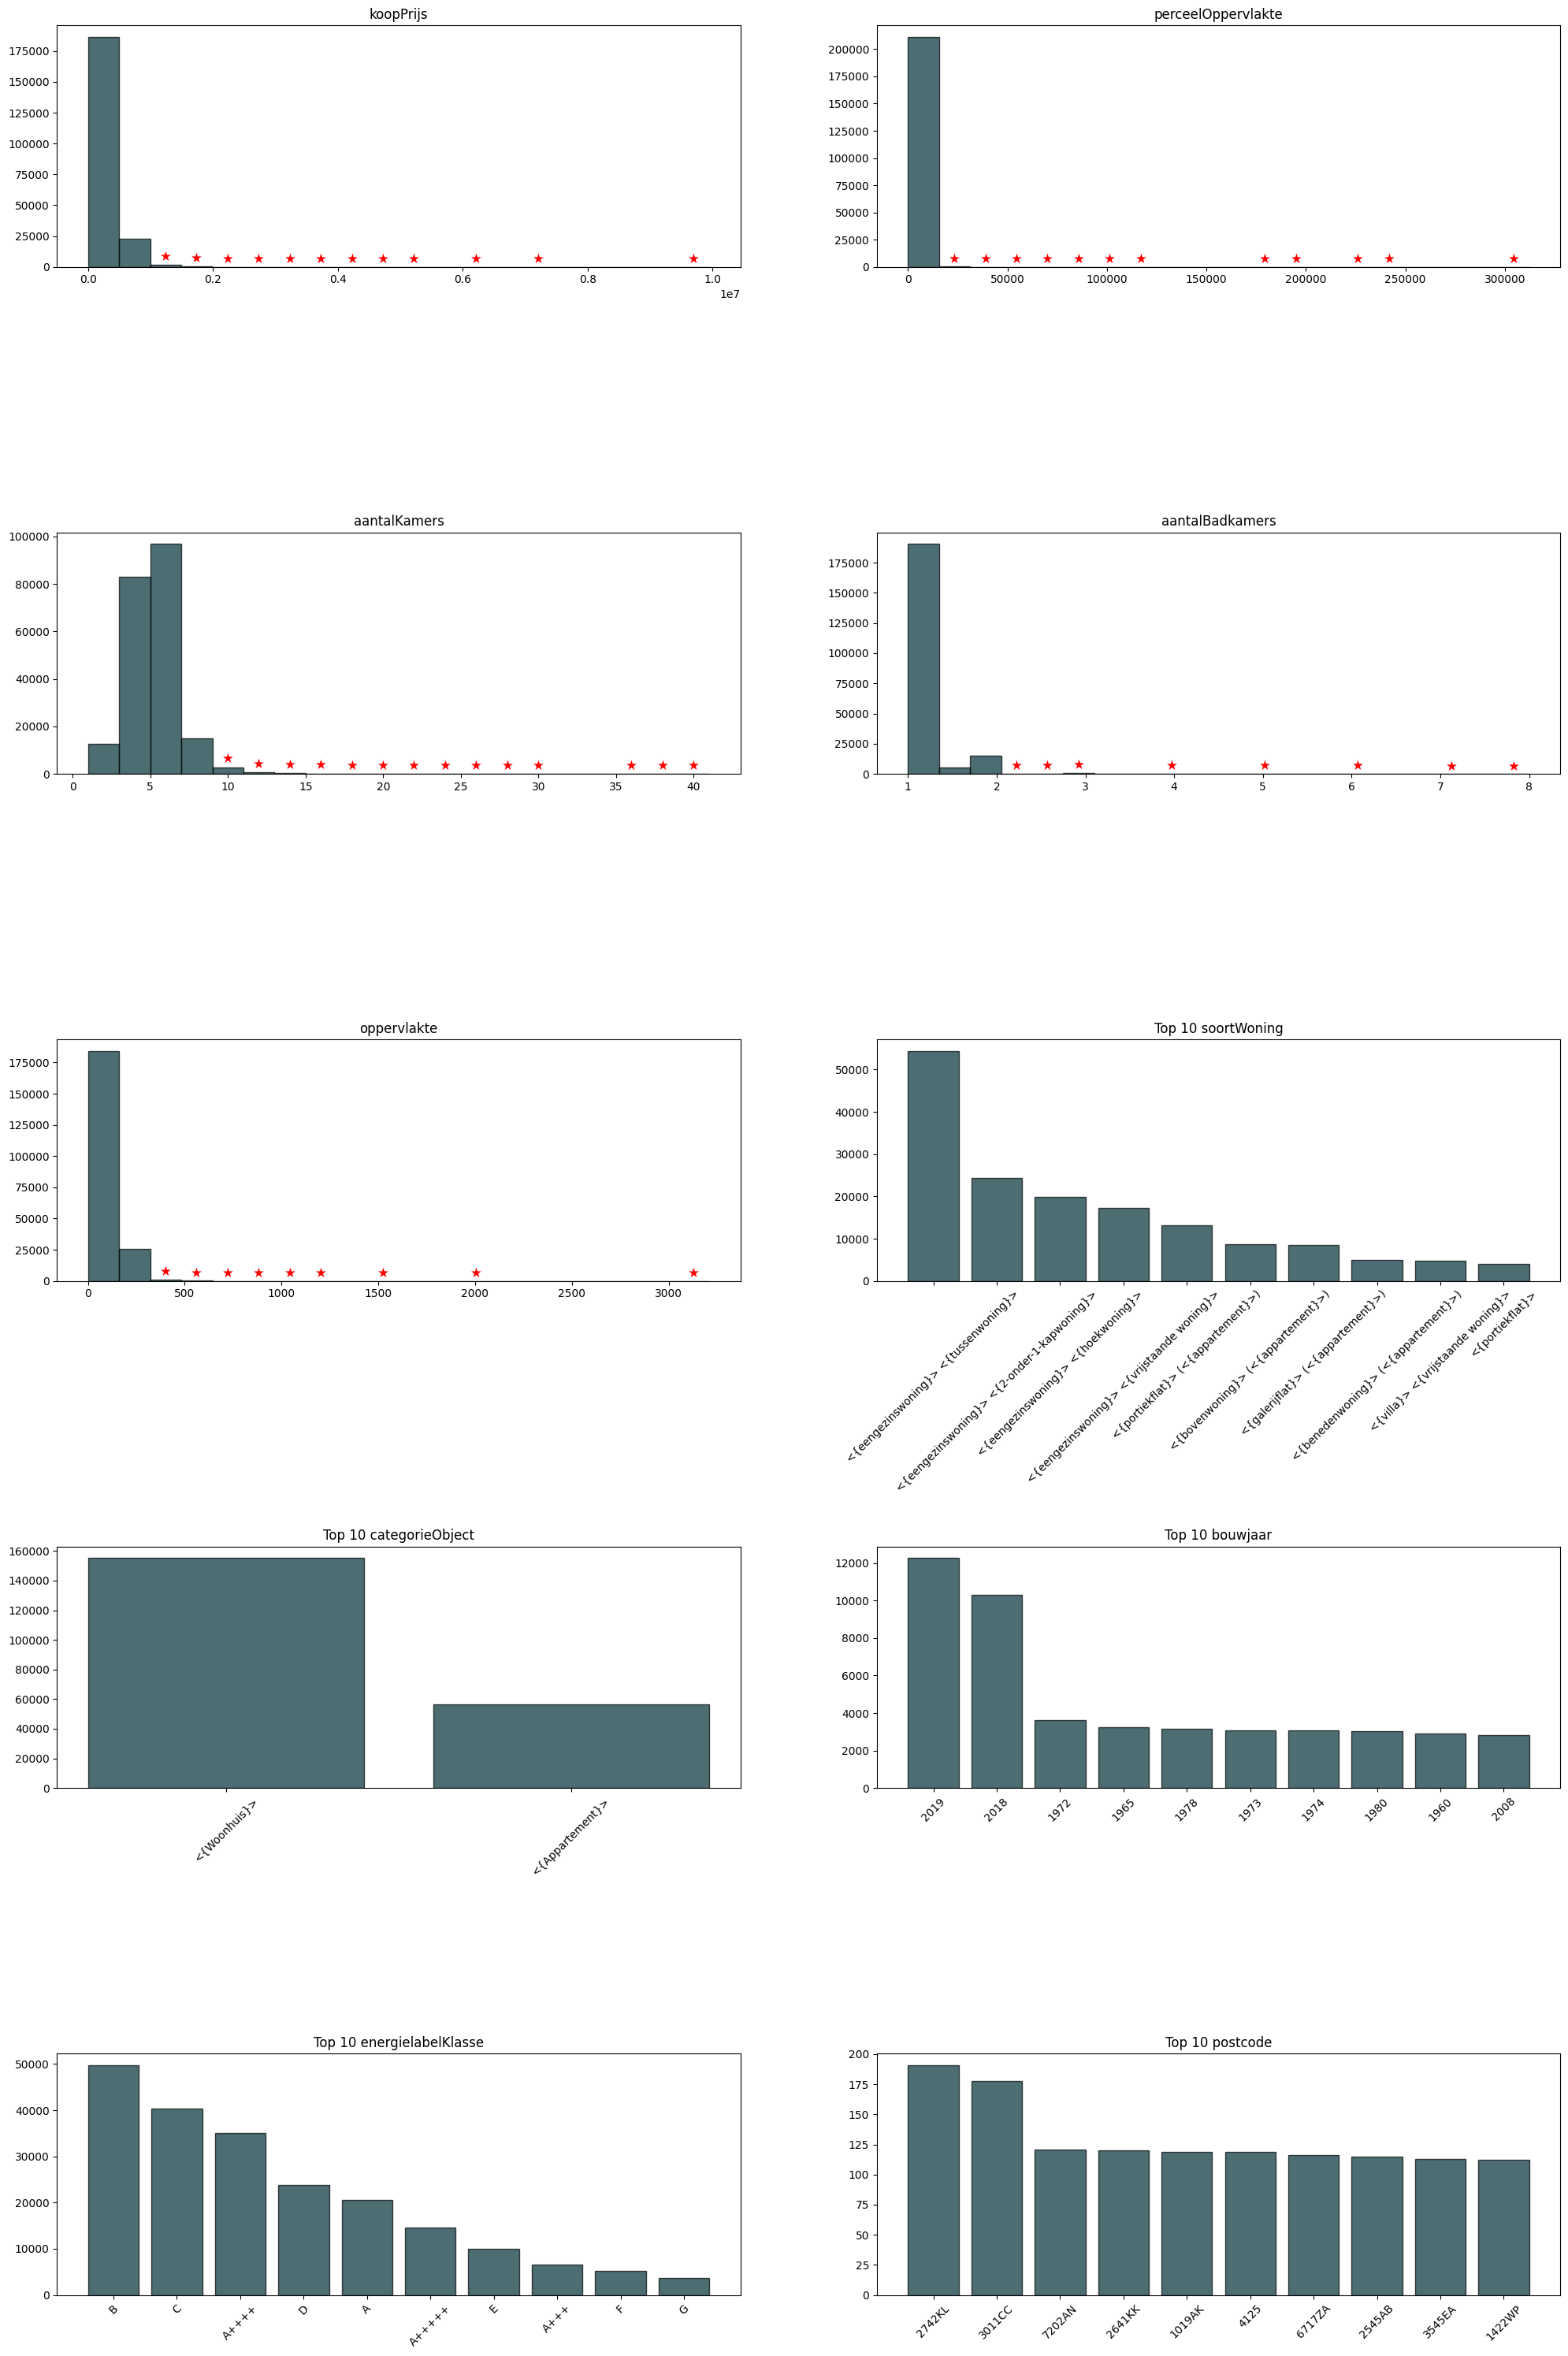

In [73]:
# Source chatgpt

# Define numerical and categorical features for visualization
numerical_features = [
    'koopPrijs', 'perceelOppervlakte', 'aantalKamers', 'aantalBadkamers', 'oppervlakte'
]

categorical_features = ['soortWoning', 'categorieObject', 'bouwjaar', 'energielabelKlasse', 'postcode']

# Set up figure with 2 columns for better layout
fig, axes = plt.subplots(nrows=(len(numerical_features) + len(categorical_features)) // 2, 
                         ncols=2, figsize=(20, 30), dpi=100)
axes = axes.flatten()

# Define an icon (simple star) to indicate very small bars
icon = "★"

# Plot numerical features as histograms
for i, feature in enumerate(numerical_features):
    data = df_funda_imputed[feature].dropna()
    counts, bins, patches = axes[i].hist(data, bins=20, color='#003038', edgecolor='k', alpha=0.7)
    axes[i].set_title(feature, fontsize=12)

    # Add stars for small bars
    for count, patch in zip(counts, patches):
        if count > 0:
            height = patch.get_height()
            x_position = patch.get_x() + patch.get_width() / 2
            if height < 5000:  # Show a star for small bars (adjusted threshold for better visibility)
                axes[i].text(x_position, height + 500, icon, ha='center', va='bottom', fontsize=12, color='red')

# Plot categorical features as bar charts (Top 10 values only)
for i, feature in enumerate(categorical_features):
    index = len(numerical_features) + i  # Continue from the next available subplot
    counts = df_funda_imputed[feature].value_counts().head(10)  # Limit to top 10 categories
    bars = axes[index].bar(counts.index.astype(str), counts.values, color='#003038', edgecolor='k', alpha=0.7)
    axes[index].set_title(f"Top 10 {feature}", fontsize=12)

    # Rotate x-axis labels for readability
    axes[index].tick_params(axis='x', labelrotation=45)

    # ✅ **Do NOT add stars for categorical features**
    
# Remove unused subplots if any
for i in range(len(numerical_features) + len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better readability
plt.tight_layout()
plt.subplots_adjust(hspace=1.1, wspace=0.2)  # Increased hspace for more vertical spacing

# Show the plots
plt.show()




#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">Feature Distributions and Interpretations (Funda Housing Dataset)</span>**  

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">**Graphs Visual Layout Explanation** </span>**   4

The graphs above show the distribution of the categorical and numerical columns or features. 

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">**Icon Representation in the Code:**</span>**

#### **<span style="color:#7AD6C7; font-size:28px; font-family:'Times New Roman';">Star (<span style="color:red;">★</span>) Icon Usage</span>**  

The **<span style="color:red;">red star (★)</span>** indicates or show the **bars that are too small to be visible** in the graphs, and it helps to visualize **low-frequency data points** so that these data point are **not overlooked** and remain part of the analysis.  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">Description of Distribution Type</span>**  

The image below shows the distribution type or direction of a graph (Gupta, 2022). 

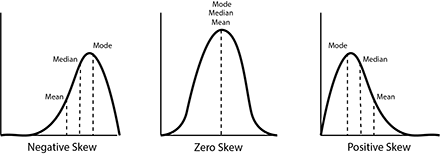  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Numerical Features</span>**  

1. **<span style="color:#7AD6C7;">koopPrijs (Purchase Price)</span>**  
   - **Distribution**: Highly skewed to the right, with most values concentrated at the lower end.  
   - **Interpretation**: Most properties have a lower price range, while only a few are high-value properties.  

2. **<span style="color:#7AD6C7;">perceelOppervlakte (Total land area or parcel size in m²)</span>**  
   - **Distribution**: Right-skewed, a large amount or ratio of the houses sold have mostly a small parcel area while a small number of properties have extremely large parcel sizes.  
   - **Interpretation**: Most properties have smaller land areas and only few properties have a large parcel size.  

3. **<span style="color:#7AD6C7;">aantalKamers (Number of Rooms)</span>**  
   - **Distribution**: Slight right skew, with a peak between 4–6 rooms.  
   - **Interpretation**: The graph shows that the majority of houses have between 4 and 6 rooms.

4. **<span style="color:#7AD6C7;">aantalBadkamers (Number of Bathrooms)</span>**  
   - **Distribution**: Right-skewed, most values are concentrated at **1 or 2 bathrooms**.  
   - **Interpretation**: Most houses in this dataset have between 1 or 2 bathrooms, but few properties have above 4 bathrooms.  

5. **<span style="color:#7AD6C7;">oppervlakte (Living Area in m²)</span>**  
   - **Distribution**: Slightly right-skewed. 
   - **Interpretation**: Most houses have reasonable indoor space, while a few large properties a large living area.  


---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Categorical Features</span>**  

6. **<span style="color:#7AD6C7;">Top 10 soortWoning (House Type)</span>**  
   - **Observation**: `Eengezinswoning` (Single-family homes) is the predominant type of housing.  
   - **Interpretation**: Most of the houses are **family-oriented houses**, followed by a smaller proportion of other property types.  

7. **<span style="color:#7AD6C7;">Top 10 categorieObject (Property Category)</span>**  
   - **Observation**: The dataset is mainly divided into `Woonhuis` (Houses) and `Appartement` (Apartments), as it was also shown in chapter 3.3.  
   - **Interpretation**: From the graph it can be seen that most of the properties are apartments and is followed by a lower share or ratio of houses.  

8. **<span style="color:#7AD6C7;">Top 10 bouwjaar (Construction Year)</span>**  
   - **Observation**: Most properties were built in the **2018 and 2019**, while much less houses were build during 1970 and 2000.  
   - **Interpretation**: The graphs shows that most properties sold by Funda are **modern as well as old properties**.  

9. **<span style="color:#7AD6C7;">Top 10 energielabelKlasse (Energy Label Class)</span>**  
   - **Observation**: **B and C** labels are the most common energy label class.  
   - **Interpretation**: From the graph it can be seen that most of the properties sold have a **moderate to very effcient energy label**, however there is still a small but significant amount of houses with **very inefficient energy label**, namely energy label F and G.  

10. **<span style="color:#7AD6C7;">Top 10 postcode (Postal Codes)</span>**  
    - **Observation**: In the top 10 postal codes it can be seen that most properties are sold in certain locations.  
    - **Interpretation**: Some areas have significantly more listings such as the postal code 2742XL and 3011CC, and it is followed by a significant number of properties that were sold the remaining postal codes, which could indicates that these are the top location with high amount of abailable properties to be sold.  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Next steps</span>**  

- **Further analysis is needed to explore price variations by properties atributties or features. This is furtehr analysed in chapter 3.5**  

 


### 3.4.2 Plotting the distribution difference of the dataset before and after imputation

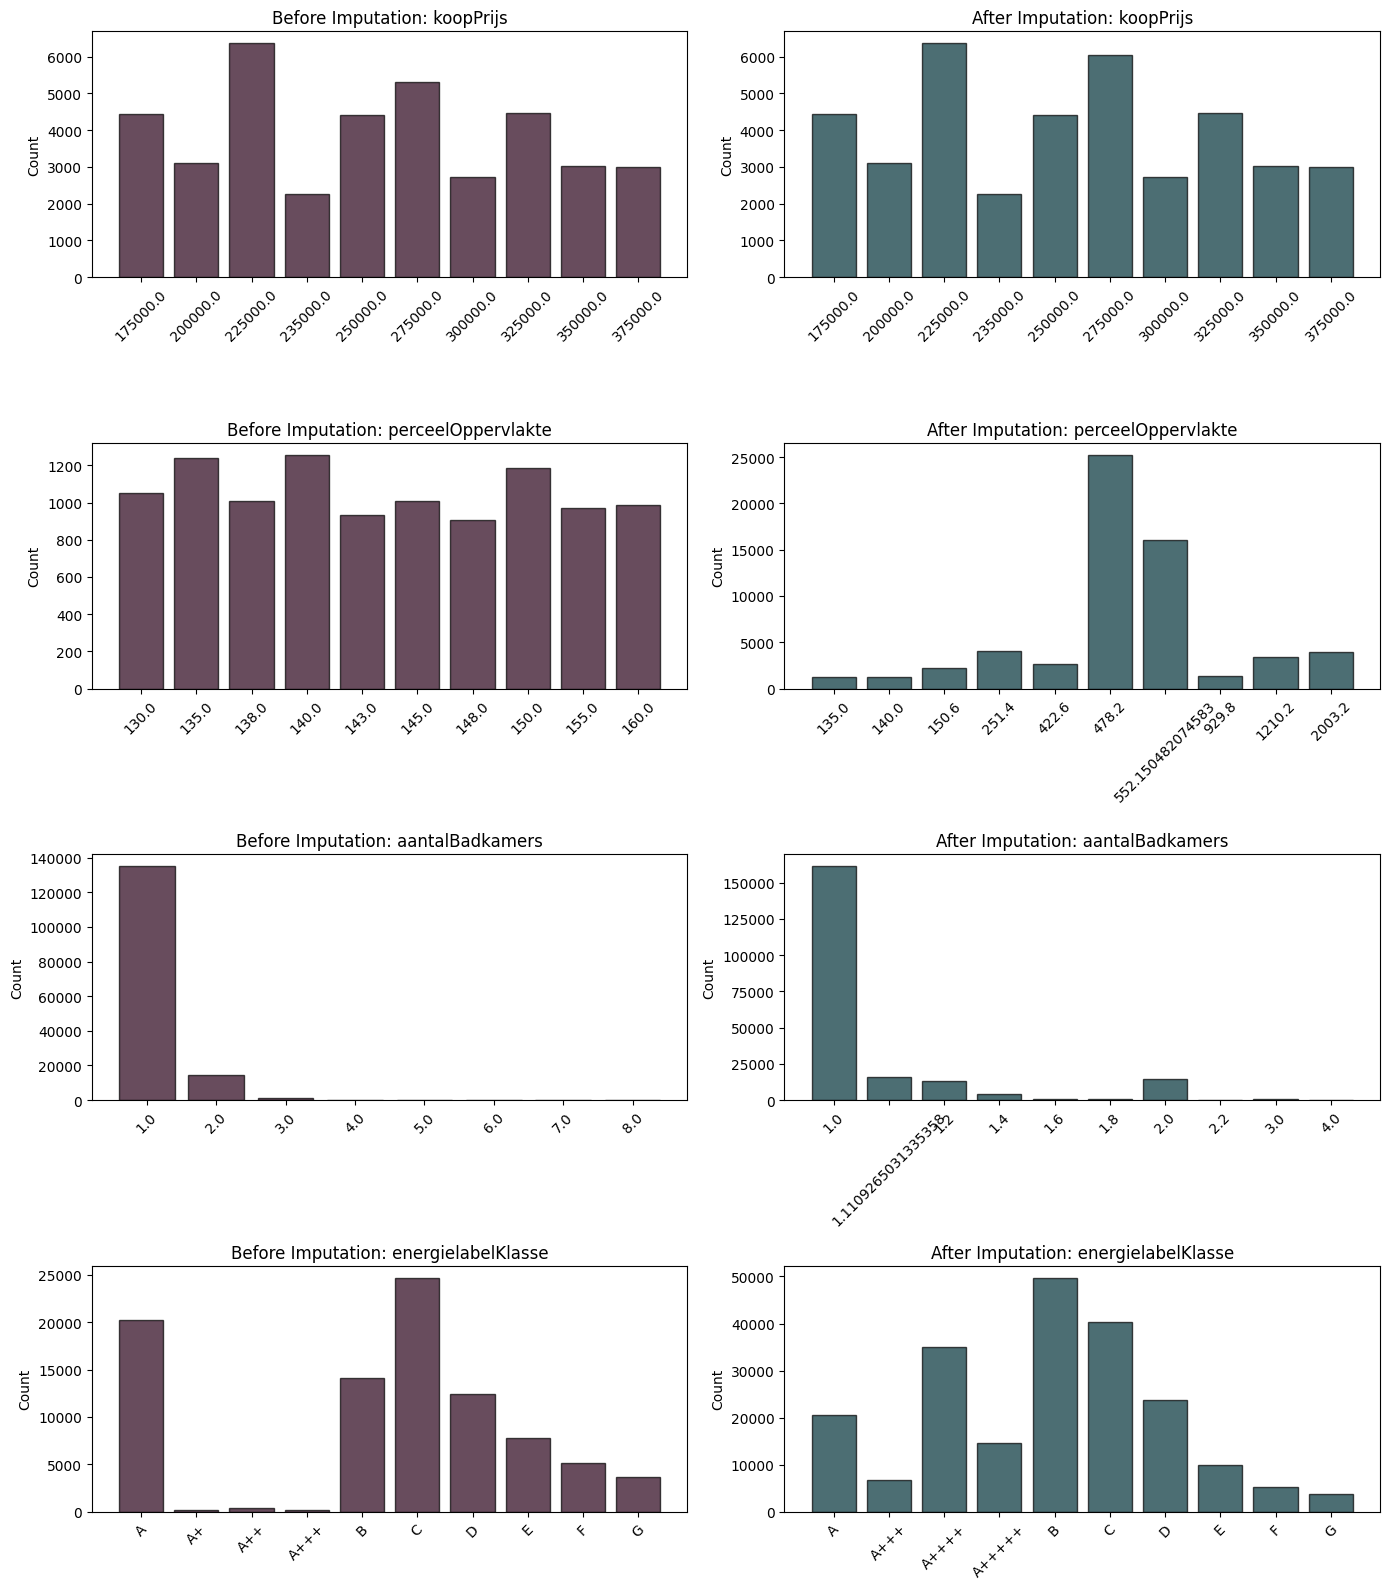

In [82]:
# Source chatgpt

import pandas as pd
import matplotlib.pyplot as plt

# List of columns that were imputed
imputed_columns = ['koopPrijs', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse']

# Set up figure with 2 columns for comparison
fig, axes = plt.subplots(len(imputed_columns), 2, figsize=(14, len(imputed_columns) * 4))

# Loop through each imputed column and create bar charts
for i, col in enumerate(imputed_columns):
    # Get value counts before and after imputation (limit to top 10 for better readability)
    before_counts = funda_housing_df[col].value_counts().nlargest(10).sort_index()
    after_counts = df_funda_imputed[col].value_counts().nlargest(10).sort_index()

    # Plot before imputation
    axes[i, 0].bar(before_counts.index.astype(str), before_counts.values, color='#280019', alpha=0.7, edgecolor='k')
    axes[i, 0].set_title(f"Before Imputation: {col}")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Plot after imputation
    axes[i, 1].bar(after_counts.index.astype(str), after_counts.values, color='#003038', alpha=0.7, edgecolor='k')
    axes[i, 1].set_title(f"After Imputation: {col}")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()






### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Reference list </span>



Gupta, R. (2022, November 9). What are right-skewed and left-skewed distributions? Medium. https://medium.com/geekculture/what-are-right-skewed-and-left-skewed-distributions-a29b3def7598